Plot saved as visualisations/augmentation_preview.png


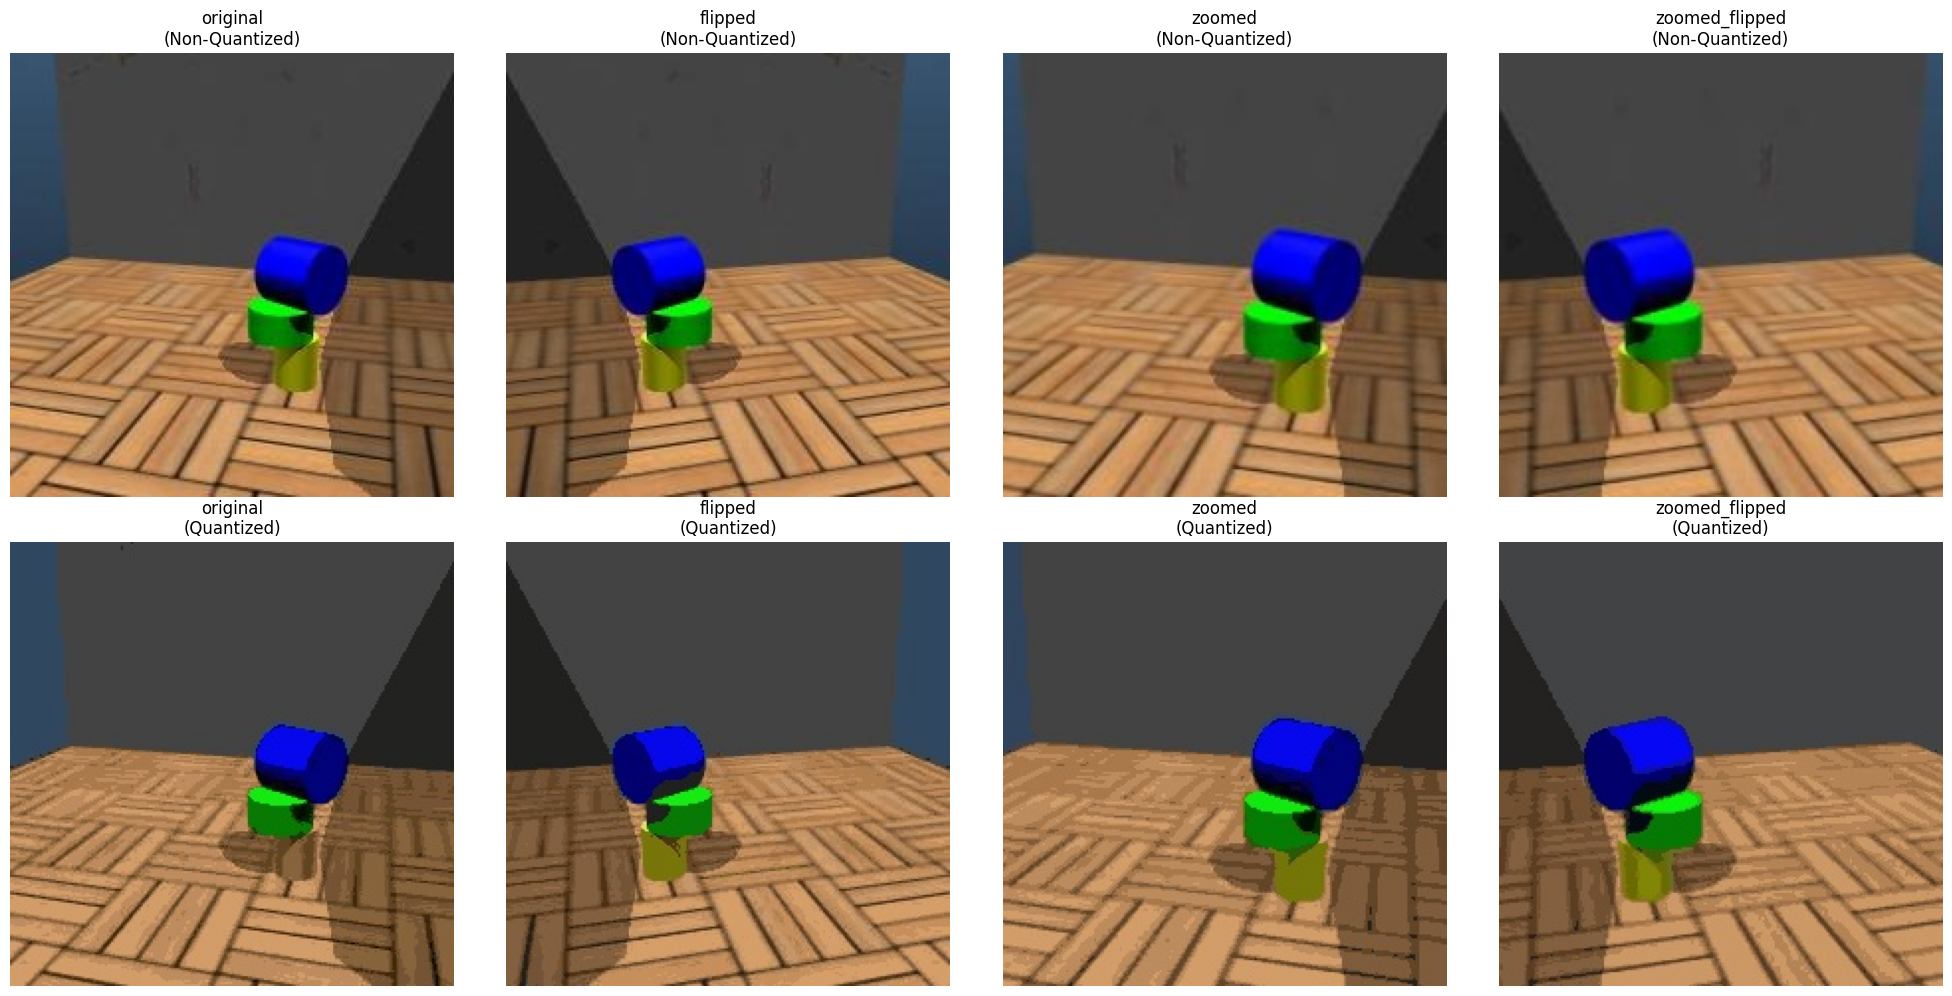

In [7]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def display_and_save_image_augmentations(image_name, base_path=".", output_file="augmentations.png"):
    # Define image variations
    variations = [
        "original",
        "flipped",
        "zoomed",
        "zoomed_flipped"
    ]
    
    # Prepare file names
    non_quantized_files = [f"{image_name}_{var}.jpg" for var in variations]
    non_quantized_files = [os.path.join(base_path, fname) for fname in non_quantized_files]
    
    # Corrected quantized file names
    quantized_files = [f"{image_name}_quantized.jpg"] + [f"{image_name}_{var}_quantized.jpg" for var in variations[1:]]
    quantized_files = [os.path.join(base_path, "quantized", fname) for fname in quantized_files]
    
    # Load images
    non_quantized_images = []
    quantized_images = []
    
    for nq_fname, q_fname in zip(non_quantized_files, quantized_files):
        if os.path.exists(nq_fname):
            non_quantized_images.append(Image.open(nq_fname))
        else:
            print(f"Warning: {nq_fname} not found.")
            non_quantized_images.append(None)
        
        if os.path.exists(q_fname):
            quantized_images.append(Image.open(q_fname))
        else:
            print(f"Warning: {q_fname} not found.")
            quantized_images.append(None)
    
    # Create and display images
    fig, axes = plt.subplots(2, len(variations), figsize=(20, 10))
    
    for i, (nq_img, q_img) in enumerate(zip(non_quantized_images, quantized_images)):
        if nq_img:
            axes[0, i].imshow(nq_img)
        axes[0, i].axis('off')
        axes[0, i].set_title(f"{variations[i]}\n(Non-Quantized)")
        
        if q_img:
            axes[1, i].imshow(q_img)
        axes[1, i].axis('off')
        axes[1, i].set_title(f"{variations[i]}\n(Quantized)")
    
    plt.tight_layout()
    
    # Save the plot as a PNG file
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print(f"Plot saved as {output_file}")
    
    # Display the plot
    plt.show()

display_and_save_image_augmentations("54", base_path="preprocessed_images/train", output_file="visualisations/augmentation_preview.png")